Import the necessary libraries

In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import copy as copy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import MinMaxScaler, binarize


Read the Personal Loan file

In [35]:
loan_df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

#take a deep copy of the dataframe

loan_copy = copy.deepcopy(loan_df)

In [36]:
loan_copy.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Exploratory Data Analysis

In [37]:
loan_copy.info()
print('\n All the fields are given in numeric format.\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB

 All the fields are given in numeric format.



ANALYSE THE DISTRIBUTION OF EACH INDEPENDENT VARIABLE.

In [39]:
#find the correlation between the attributes
correlation = loan_copy.corr()

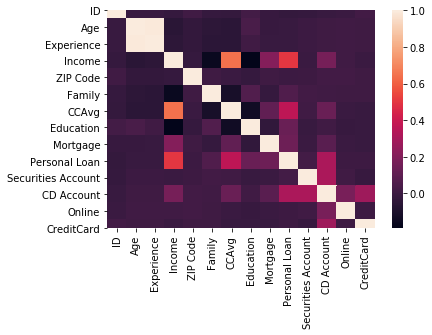

In [40]:
sns.heatmap(correlation)

In [41]:
print('\nThere is a strong correlation between Age and Experience.\n'
      'Experience field could be dropped.')
correlation


There is a strong correlation between Age and Experience.
Experience field could be dropped.


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


In [42]:
columns = loan_copy.columns.values
print('\n COLUMNS:\n',columns)
print('\n The binomial independent variables are:\n',columns[10:])
print('\n The Target dependent variable:\n', 'Personal Loan')


 COLUMNS:
 ['ID' 'Age' 'Experience' 'Income' 'ZIP Code' 'Family' 'CCAvg' 'Education'
 'Mortgage' 'Personal Loan' 'Securities Account' 'CD Account' 'Online'
 'CreditCard']

 The binomial independent variables are:
 ['Securities Account' 'CD Account' 'Online' 'CreditCard']

 The Target dependent variable:
 Personal Loan


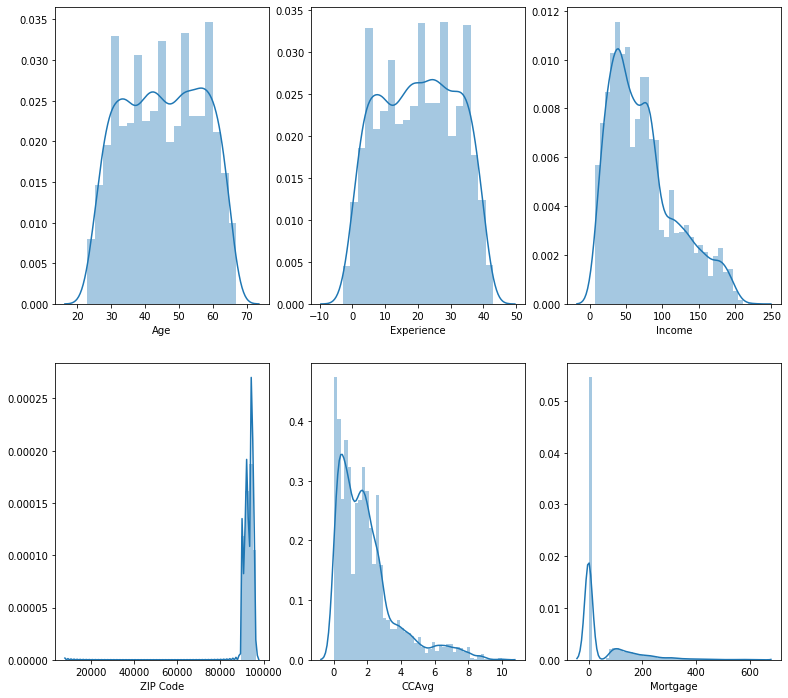

In [43]:
fig, ax = plt.subplots(nrows = 2,ncols = 3, figsize=(13,12))
sns.distplot(loan_copy['Age'], ax = ax[0][0])
sns.distplot(loan_copy['Experience'], ax = ax[0][1])
sns.distplot(loan_copy['Income'], ax = ax[0][2])
sns.distplot(loan_copy['ZIP Code'], ax = ax[1][0])
sns.distplot(loan_copy['CCAvg'], ax = ax[1][1])
sns.distplot(loan_copy['Mortgage'], ax = ax[1][2])


Inferences from the above graph: 
    
Age :Most of the data is concentrated around the age group from 30 to 60.
     The data is equally distributed from the mean.
     
Experience : people of experiences 5 to 35 are the highest contributors.
             The data is equally distributed from the mean similar to Age.
             
Income: The distribution is right skewed and the values are more concentrated
        around 30 to 80.
        
ZIP code: There is one outlier found in this attribute. It could be due to incorrect data or misplaced information.

CCAvg : The data is right skewed with some outliers present. Most of the details are densely packed in 0 to 2.

Mortgage: Most of the value corresponds to zero. However, there are some outliers present with higher values such as 200 to 400.    




C:\Users\Nandhu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Nandhu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


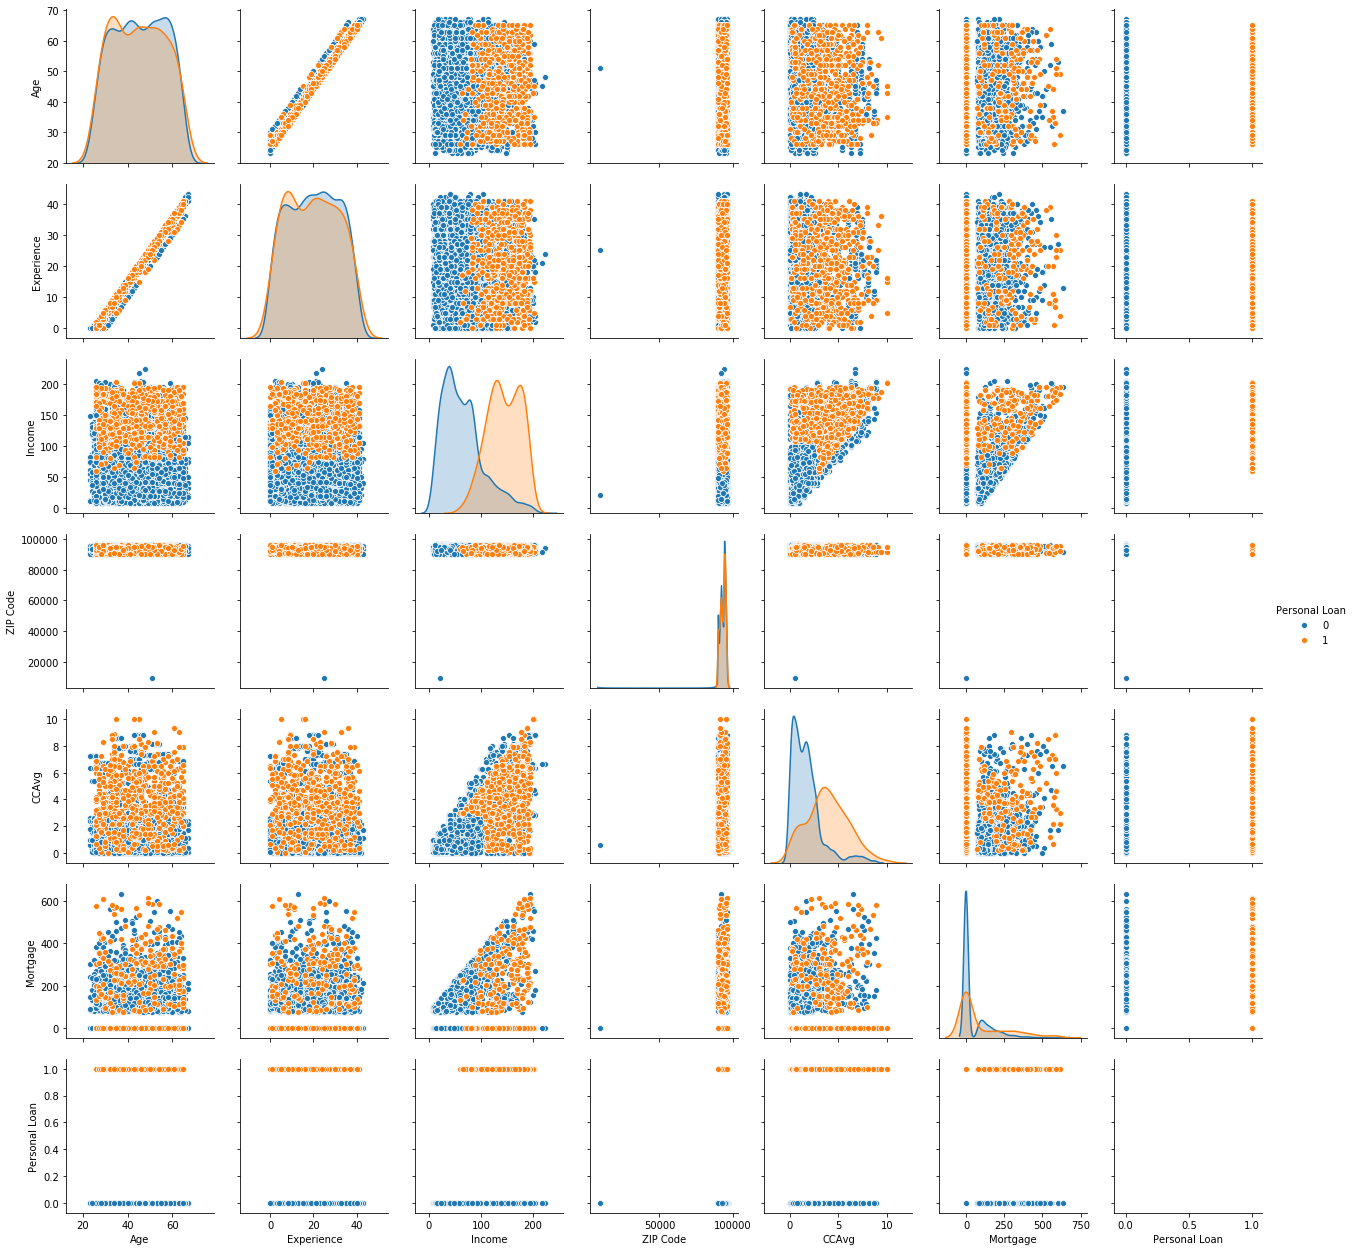

In [23]:
sns.pairplot(loan_copy[['Age', 'Experience', 'Income', 'ZIP Code', 'CCAvg', 'Mortgage', 'Personal Loan']], hue = 'Personal Loan')

Inferences of Attributes relation from the above pairplot:
1) People of Higher income group are more likely to take personal loan
2) As the CCAvg increases, there are higher chances of taking loan

Analysis of Discrete attributes

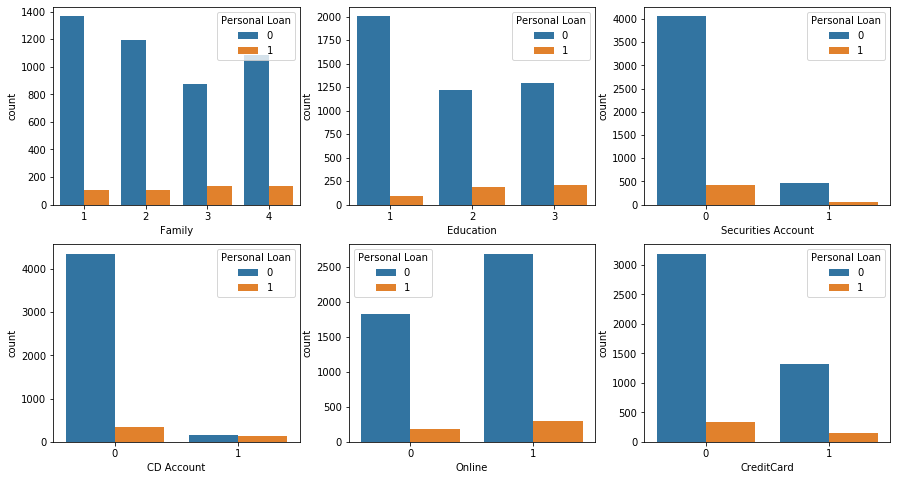

In [44]:
fig, ax = plt.subplots(nrows = 2,ncols = 3, figsize=(15,8))
sns.countplot(loan_copy['Family'], hue = loan_copy['Personal Loan'], ax = ax[0][0])
sns.countplot(loan_copy['Education'], hue = loan_copy['Personal Loan'], ax = ax[0][1])
sns.countplot(loan_copy['Securities Account'], hue = loan_copy['Personal Loan'], ax = ax[0][2])
sns.countplot(loan_copy['CD Account'], hue = loan_copy['Personal Loan'], ax = ax[1][0])
sns.countplot(loan_copy['Online'], hue = loan_copy['Personal Loan'], ax = ax[1][1])
sns.countplot(loan_copy['CreditCard'], hue = loan_copy['Personal Loan'], ax = ax[1][2])



Inferences for the Discrete values:

Family : The personal loan data is equally distributed across all categories.

Education : People with education level '1' is less likely to take loans when
            compare to other groups.
            
Securities Account: Most of the people do not have securities account.

CD Account: Most of the people do not have CD account.

Online : The group which access online is high compared to those who don't.

Credit Card: Most of the people do not prefer credit cards. 

Target Variable Analysis:

In [45]:
loan_copy.groupby('Personal Loan').describe().T

Personal Loan               0            1
ID         count  4520.000000   480.000000
           mean   2512.165487  2390.650000
           std    1448.299331  1394.393674
           min       1.000000    10.000000
           25%    1259.750000  1166.500000
...                       ...          ...
CreditCard min       0.000000     0.000000
           25%       0.000000     0.000000
           50%       0.000000     0.000000
           75%       1.000000     1.000000
           max       1.000000     1.000000

[104 rows x 2 columns]

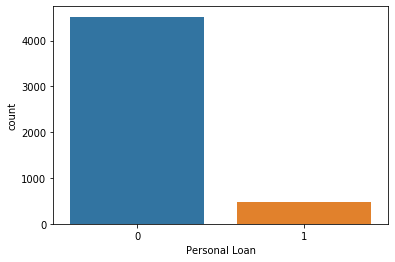

In [46]:
sns.countplot(loan_copy['Personal Loan'])

Inference about the Target Variable(Personal Loan): 

    => Out of 5000 rows, 4520 belongs to not taking loan and 480 took loan.
    => There are more number of data correspond to people not taking loan.
    => 480/5000 = 9.6% people have taken personal loan.

In [47]:
#dropping the zip code 9307
loan_copy = loan_copy[loan_copy['ZIP Code'] != 9307]

In [48]:
loan_copy.shape

(4999, 14)

In [49]:
loan_copy.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [50]:
#ID can be dropped as it is a sequence number
#Experience can be removed because of the correlation with Age
X = loan_copy.drop(['ID', 'Experience', 'ZIP Code', 'Personal Loan'], axis = 1)
y = loan_copy['Personal Loan']

In [51]:
#scale down the independent features using zscore
minmaxscaler = MinMaxScaler()
X = minmaxscaler.fit_transform(X)

In [52]:
np.random.seed(1)

In [53]:
train_x, test_x, train_y, test_y = train_test_split(X,y,test_size = 0.3, random_state =1)

In [54]:
print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(loan_copy.loc[loan_copy['Personal Loan'] == 1]), (len(loan_copy.loc[loan_copy['Personal Loan'] == 1])/len(loan_copy.index)) * 100))
print("Original Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(loan_copy.loc[loan_copy['Personal Loan'] == 0]), (len(loan_copy.loc[loan_copy['Personal Loan'] == 0])/len(loan_copy.index)) * 100))
print("")
print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(train_y[train_y[:] == 1]), (len(train_y[train_y[:] == 1])/len(train_y)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(train_y[train_y[:] == 0]), (len(train_y[train_y[:] == 0])/len(train_y)) * 100))
print("")
print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(test_y[test_y[:] == 1]), (len(test_y[test_y[:] == 1])/len(test_y)) * 100))
print("Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(test_y[test_y[:] == 0]), (len(test_y[test_y[:] == 0])/len(test_y)) * 100))
print("")

Original Personal Loan True Values    : 480 (9.60%)
Original Personal Loan False Values   : 4519 (90.40%)

Training Personal Loan True Values    : 332 (9.49%)
Training Personal Loan False Values   : 3167 (90.51%)

Test Personal Loan True Values        : 148 (9.87%)
Test Personal Loan False Values       : 1352 (90.13%)



APPLY LOGISTICREGRESSION ALGORITHM

In [128]:
logisticregression = LogisticRegression(random_state = 1, solver = 'liblinear')
logisticregression.fit(train_x, train_y)
predict_y = logisticregression.predict(test_x)
print('train_accuracy:',logisticregression.score(train_x, train_y))
print('test_accuracy:',logisticregression.score(test_x, test_y))

probability1 = logisticregression.predict_proba(test_x)
print('\nprobability of the class 1:' , probability1[:,1])

fpr1, tpr1,thresholds1 = roc_curve(test_y, probability1[:,1])
auc1_curve = auc(fpr1, tpr1)
print('\narea under the curve:', auc1_curve)

train_accuracy: 0.9499857102029151
test_accuracy: 0.9446666666666667

probability of the class 1: [0.00198383 0.13693048 0.45756297 ... 0.03883944 0.0079017  0.01632248]

area under the curve: 0.9632326483288022


Support Vector Machine Algorithm

In [129]:
svc = SVC(random_state = 2,  kernel = 'linear', probability = True)
svc.fit(train_x, train_y)
predict_y = svc.predict(test_x)
print('train_accuracy:',svc.score(train_x, train_y))
print('test_accuracy:',svc.score(test_x, test_y))


probability2 = svc.predict_proba(test_x)
print('\nprobability of the class 1:' , probability2[:,1])

fpr2, tpr2,thresholds2 = roc_curve(test_y, probability2[:,1])
auc2_curve = auc(fpr2, tpr2)
print('\narea under the curve:', auc2_curve)

train_accuracy: 0.9537010574449842
test_accuracy: 0.9446666666666667

probability of the class 1: [1.50302517e-04 1.08154600e-01 5.42321812e-01 ... 2.97701370e-02
 1.33139416e-03 4.16233881e-03]

area under the curve: 0.959844274748121


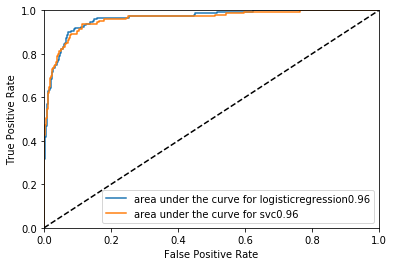

In [130]:
#plot both the curves and see how the area under the curves look like
# Plot the ROC

# Plot ROC curve
plt.plot(fpr1, tpr1, label = 'area under the curve for logisticregression%0.2f'%auc1_curve)
plt.plot(fpr2, tpr2, label = 'area under the curve for svc%0.2f'%auc2_curve)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')


In [159]:
first_ten = svc.predict_proba(test_x)[0:10, 1].reshape(-1,1)

In [164]:
print(first_ten)

[[1.50302517e-04]
 [1.08154600e-01]
 [5.42321812e-01]
 [5.63157614e-03]
 [7.36608042e-04]
 [1.94469560e-02]
 [8.68678248e-03]
 [5.20737217e-03]
 [3.03718231e-04]
 [6.24081127e-02]]


In [163]:
binarize(first_ten,0.01)

array([[0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.]])

We can check the values of sensitivity and specificity for various values of thresholds.